# Spectrums

In [1]:
%matplotlib inline
%load_ext autoreload 
%autoreload 2

import pprint
pp = pprint.PrettyPrinter(indent=4)
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import ee
import numpy as np

# Import and intialize the Google Earth Engine Library
from gee_library import *
ee.Initialize()

In [6]:
# First we create load a collection from the GEE database. 
world_collection = ee.ImageCollection(ee.Image('USGS/NED'))


print collection_length(world_collection), "images available."

pp.pprint(world_collection.first().getInfo())

1 images available.
{   u'bands': [   {   u'crs': u'EPSG:4269',
                      u'crs_transform': [   9.2592592593e-05,
                                            0.0,
                                            -171.00000000138644,
                                            0.0,
                                            -9.2592592593e-05,
                                            70.00000000028116],
                      u'data_type': {   u'precision': u'float',
                                        u'type': u'PixelType'},
                      u'dimensions': [3618000, 918000],
                      u'id': u'elevation'}],
    u'id': u'USGS/NED',
    u'properties': {   u'date_range': [1328572800000.0, 1328572800000.0],
                       u'description': u'The National Elevation Dataset (NED) is the primary   elevation data product of the USGS. The NED is a seamless dataset with   the best available raster elevation data of the coterminous United   States, Alaska, Hawa

In [27]:
half_dome_bounds = bound_geometry(
                        (-119.602182, 37.785778),
                        ( -119.441835, 37.696117))

half_dome_bounds = bound_geometry(
                        (-122.400923, 38.391007),
                        ( -119.441835, 36.696117))

print image_size_at_resolution(half_dome_bounds, 1000)
    
half_dome_collection = world_collection.filterBounds(half_dome_bounds)

# dates_of_images = dates_available(half_dome_collection)
# print "Dates available:",dates_of_images
# print "Bands available:", available_bands(half_dome_collection)

{'width': 264.4273064683501, 'height': 188.11383757616233}


{'elevation': './tmp/86434704/map_section.elevation.tif'}


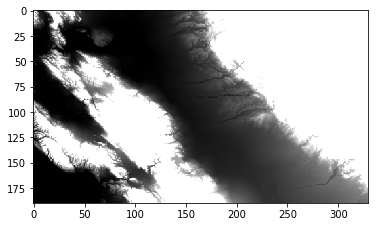

In [28]:
elevation_img = img_at_region(
    half_dome_collection,
    1000,
    ['elevation'],
    half_dome_bounds)

img = np.array(elevation_img['elevation'])

minvalue = np.amin(img)
img -= minvalue
img *= 255/(255-minvalue)

plt.imshow(img); plt.show()